[0 1 0 2 1 1 2 0 1 2 0 1 2 2 0 1 0 0 0 1 2 1 2 2 0 1 0 2 2 1 1 0 1 1 0 2 0
 1 0 0 2 0 2 0 1 2 0 1 1 2 2 1 0 1 0 1 1 0 2 2 0 2 1 1 2 1 1 2 0 0 2 2 1 2
 2 2 0 0 0 0 0 2 1 0 1 0 0 1 1 1 2 1 0 2 1 2 2 2 0 0 2 0 2 0 2 2 1 1 0 1 1
 2 0 2 1 0 2 1 0 2 0 1 2 1 1 2 1 2 1 1 0 1 2 2 2 0 0 0 2 1 1 2 1 0 2 0 1 2
 0 0]
[[ 1.63062115e+01 -2.93581343e+00]
 [ 5.76003313e+00  8.20504951e+00]
 [ 1.65711727e+01 -3.19716740e+00]
 [-1.40993023e+00  4.36555099e+00]
 [ 6.58071232e+00  7.04010391e+00]
 [ 6.63198614e+00  7.59724426e+00]
 [-1.68005764e-01  4.84018326e+00]
 [ 1.74080162e+01 -3.19397640e+00]
 [ 3.45553565e+00  7.30718851e+00]
 [-8.00235868e-01  5.29799509e+00]
 [ 1.64305229e+01 -2.93711209e+00]
 [ 5.66555643e+00  7.90098524e+00]
 [-1.49617517e+00  4.08388138e+00]
 [-1.67668235e+00  3.69518423e+00]
 [ 1.68717861e+01 -3.03782892e+00]
 [ 3.23193121e+00  7.68465042e+00]
 [ 1.66628456e+01 -2.86665440e+00]
 [ 1.70946617e+01 -3.23037338e+00]
 [ 1.96532745e+01 -2.62216878e+00]
 [ 3.91382861e+00  7.23863840

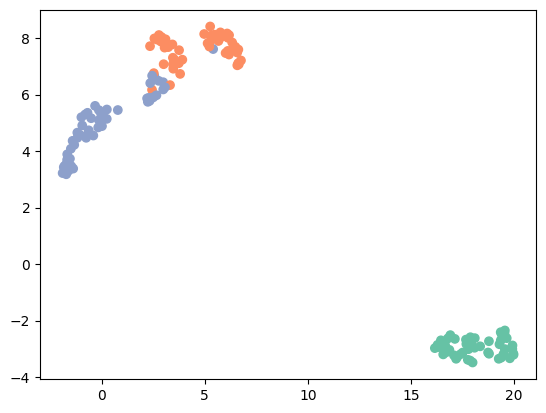

In [111]:
import numpy as np
from umap import UMAP
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns

def extract_train_files():
    return load_iris(return_X_y=True)

train_files, labels = extract_train_files()
num_classes = len(set(labels))
train_files, labels = shuffle(train_files, labels)
print(labels)

embeddings = UMAP().fit_transform(train_files)
print(embeddings)

rgb_values = sns.color_palette("Set2", num_classes)
print(embeddings[:, 0])

color_map = dict(zip(set(labels), rgb_values))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.array([color_map[label] for label in labels]))
plt.show()


In [112]:
kmeans = KMeans(n_clusters=num_classes, n_init='auto').fit(train_files)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(train_files)

def calculate_external_metrics(model, labels):
    claster_labels = model.labels_
    tp, tn, fn, fp = 0, 0, 0, 0
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            label_i = labels[i]
            label_j = labels[j]
            claster_label_i = claster_labels[i] 
            claster_label_j = claster_labels[j]
            if label_i == label_j and claster_label_i == claster_label_j:
                tp += 1
            elif label_i != label_j and claster_label_j != claster_label_i:
                tn += 1
            elif label_i == label_j and claster_label_i != claster_label_j:
                fn += 1
            else:
                fp += 1

    return tp / (tp + fp + fn)


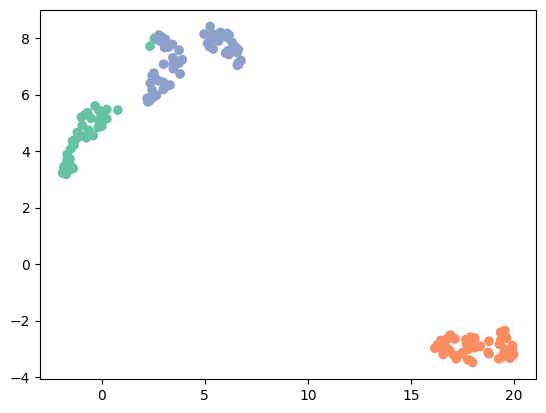

In [113]:
claster_labels = kmeans.labels_
color_map = dict(zip(set(claster_labels), rgb_values))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.array([color_map[label] for label in claster_labels]))
plt.show()

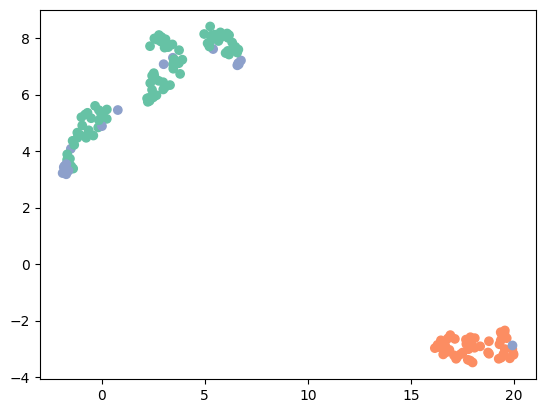

In [114]:
claster_labels = dbscan.labels_
color_map = dict(zip(set(claster_labels), rgb_values))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.array([color_map[label] for label in claster_labels]))
plt.show()

In [115]:
from sklearn.metrics import silhouette_score
print("Internal score:", silhouette_score(train_files, kmeans.labels_))
print("External score:", calculate_external_metrics(kmeans, labels))

Internal score: 0.5528190123564096
External score: 0.6958587915818059


In [116]:
from sklearn.metrics import silhouette_score
print("Internal score:", silhouette_score(train_files, dbscan.labels_))
print("External score:", calculate_external_metrics(dbscan, labels))

Internal score: 0.48603419703456857
External score: 0.5374705135184177


c:\Users\nikolya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nikolya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nikolya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nikolya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

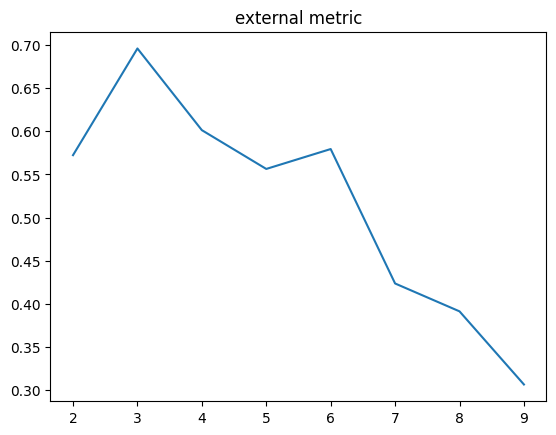

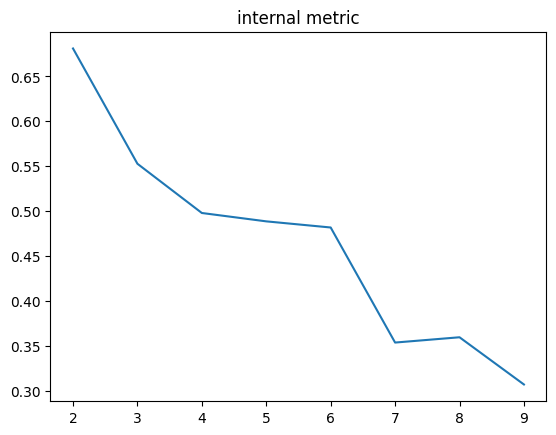

In [117]:
externals = []
internals = []

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters).fit(train_files)
    externals.append(calculate_external_metrics(kmeans, labels))
    internals.append(silhouette_score(train_files, kmeans.labels_))

plt.title("external metric")
plt.plot(range(2, 10), externals)
plt.show()
plt.title("internal metric")
plt.plot(range(2, 10), internals)
plt.show()


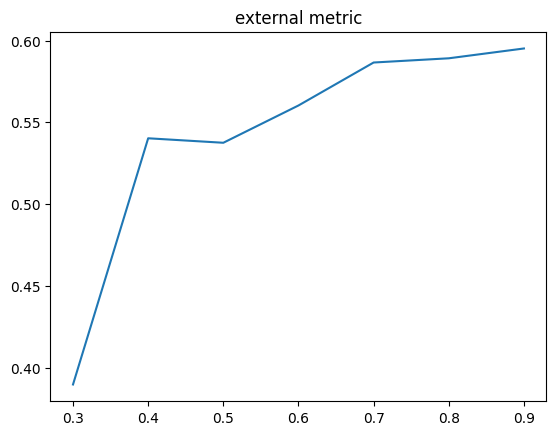

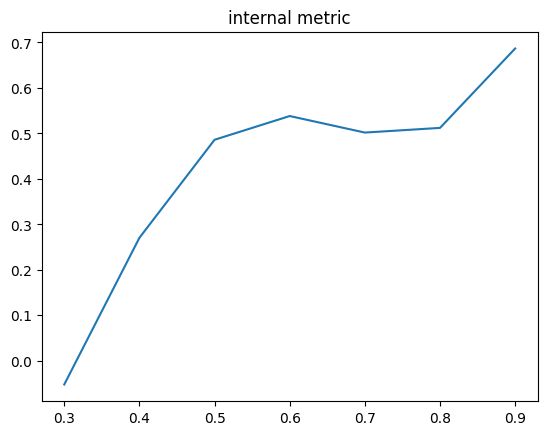

In [118]:
externals = []
internals = []
interval = np.arange(0.3, 1, 0.1)
for eps in interval:
    dbscan = DBSCAN(eps=eps).fit(train_files)
    externals.append(calculate_external_metrics(dbscan, labels))
    internals.append(silhouette_score(train_files, dbscan.labels_))

plt.title("external metric")
plt.plot(interval, externals)
plt.show()
plt.title("internal metric")
plt.plot(interval, internals)
plt.show()